In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import cmocean
from glob import glob
from tqdm import tqdm
import gen_utils
from os.path import join
import seaborn as sns
sns.set()

In [24]:
lon_range = [-75,-54]
lat_range = [32,43]
data = xr.open_mfdataset(sorted(glob('mur-data/2018*.nc')))
data = data.sel(lon=slice(*lon_range), lat=slice(*lat_range))['analysed_sst'].compute()
# data = (data-data.mean(['lon','lat'])) / data.std(['lon','lat'])
# data = (data-data.mean(['lon'])) # divide by mean latitude anomaly
# data = (data - data.mean(['lon','lat'])) + data.mean(['lon','lat','time']) # remove trend
# data = (data - data.min(['lon','lat'])) / (data.max(['lon','lat']) - data.min(['lon','lat'])) # normalize to

In [36]:
lev = np.arange(295,302.25,.25)
plot_range = [285,300,32,43]
# lev = gen_utils.make_cb_range(7,1)  # for all mean removed
# lev = np.arange(0.15,.95,.05) # for normalized to [0,1]
# lev = np.arange(-3,3.5,.5)

def plot_slice(i, save_path=None):
    fig = plt.figure(figsize = (7,5))                                       
    ax = plt.axes(projection=ccrs.Orthographic(central_longitude=292, 
                                               central_latitude=40)) # Use map background
    ax.set_extent(plot_range, crs=ccrs.PlateCarree())
    ax.coastlines(linewidth=.6) 
    ax.add_feature(cfeature.BORDERS, zorder=1, linewidth=.6)
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=.3, linewidth=.3, color='k', zorder=1.05)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 11}
    gl.ylabel_style = {'size': 11}
    cp = ax.contourf(data.lon, data.lat, data.isel(time=i), transform=ccrs.PlateCarree(), cmap='cmo.thermal',
                    levels=lev, extend='both')
    time = data.isel(time=i).time
    ye = time.dt.year
    mo = time.dt.month
    da = time.dt.day
    ye,mo,da = [x.values.item() for x in [ye,mo,da]]
    ax.set_title(f'{ye}-{mo}-{da:02d}')
    cb = fig.colorbar(cp,  orientation='vertical', fraction=.05, pad=.04)
    if save_path is None:
        plt.show()
    else:
        fig.savefig(join(save_path, f'{i:03d}.png'))
        plt.close(fig)

In [37]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150

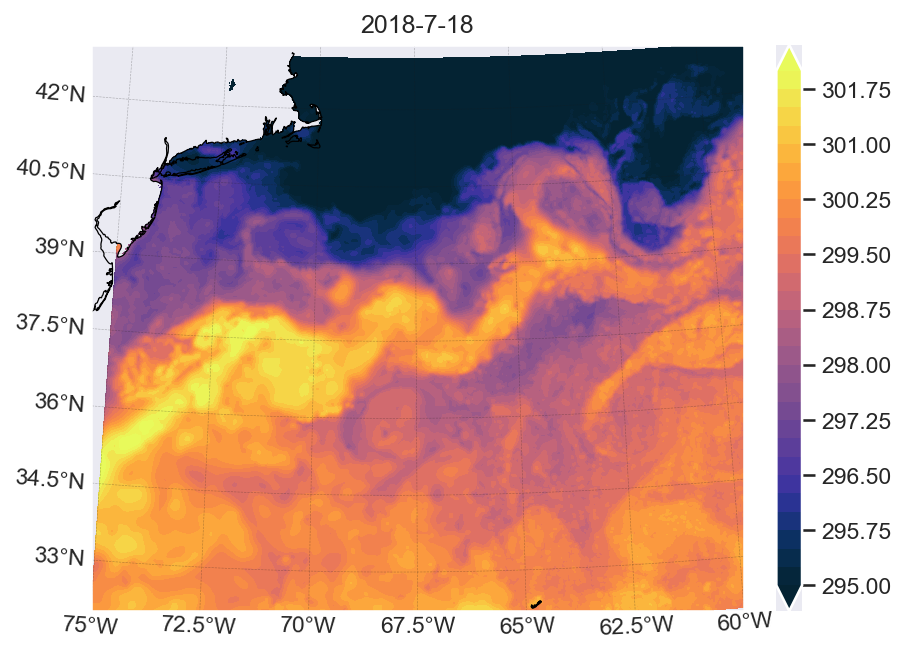

In [44]:
plot_slice(47)

36.25 latitude
add more data - 2 more years

In [19]:
for i, t in tqdm(enumerate(data.time)):
    plot_slice(i, save_path='2020-figs')
#     plot_slice(0, save_path=None)
#     break

92it [09:38,  6.29s/it]


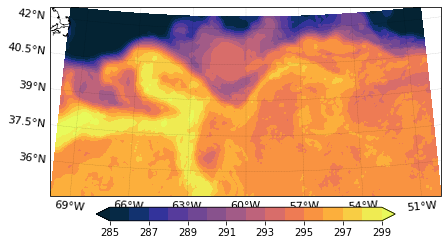

In [32]:
fig = plt.figure(figsize = (7,5))                                       
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=300, 
                                           central_latitude=40)) # Use map background
ax.set_extent([290,310,34.5,42.5], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=.6) 
ax.add_feature(cfeature.BORDERS, zorder=1, linewidth=.6)
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=.3, linewidth=.3, color='k', zorder=1.05)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 11}
gl.ylabel_style = {'size': 11}
cp = ax.contourf(data.lon, data.lat, data.isel(time=0), transform=ccrs.PlateCarree(), cmap='cmo.thermal',
                levels=np.arange(285,300,1), extend='both')
cb = fig.colorbar(cp,  orientation='horizontal', fraction=.05, pad=.04)
plt.show()

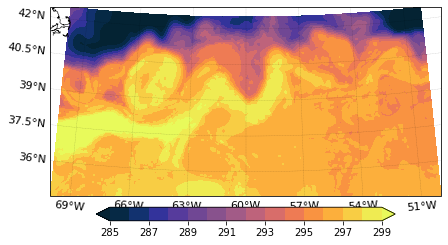

In [33]:
fig = plt.figure(figsize = (7,5))                                       
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=300, 
                                           central_latitude=40)) # Use map background
ax.set_extent([275,320,25,45], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=.6) 
ax.add_feature(cfeature.BORDERS, zorder=1, linewidth=.6)
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=.3, linewidth=.3, color='k', zorder=1.05)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 11}
gl.ylabel_style = {'size': 11}
cp = ax.contourf(data.lon, data.lat, data.isel(time=1), transform=ccrs.PlateCarree(), cmap='cmo.thermal',
                levels=np.arange(285,300,1), extend='both')
cb = fig.colorbar(cp,  orientation='horizontal', fraction=.05, pad=.04)
plt.show()

# phase speed estimates

Est. wavelength:  148.86 km
Est. phase speed: 8.17 km/day


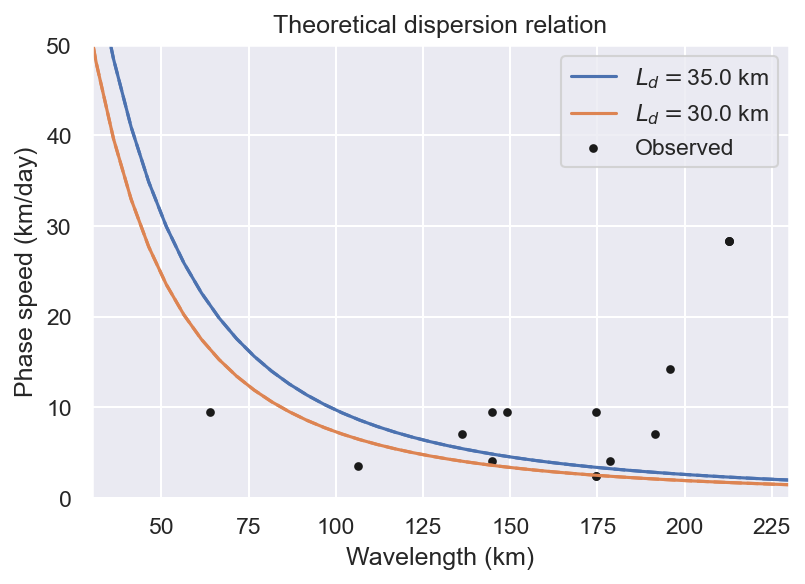

## load and plot multiple

In [3]:
data = xr.open_mfdataset(sorted(glob('mur-data/2021*.nc'))[:-2])['analysed_sst']
data.load() # load to memory

<xarray.DataArray 'analysed_sst' (time: 90, lat: 2002, lon: 4502)>
array([[[300.974  , 300.896  , 300.815  , ..., 297.63498, 297.632  ,
         297.628  ],
        [300.986  , 300.91098, 300.828  , ..., 297.664  , 297.659  ,
         297.65298],
        [300.992  , 300.915  , 300.828  , ..., 297.686  , 297.681  ,
         297.673  ],
        ...,
        [      nan,       nan,       nan, ..., 289.442  , 289.426  ,
         289.408  ],
        [      nan,       nan,       nan, ..., 289.43698, 289.41998,
         289.4    ],
        [      nan,       nan,       nan, ..., 289.431  , 289.412  ,
         289.391  ]],

       [[300.505  , 300.483  , 300.458  , ..., 297.50598, 297.507  ,
         297.50998],
        [300.479  , 300.465  , 300.447  , ..., 297.512  , 297.513  ,
         297.517  ],
        [300.453  , 300.448  , 300.438  , ..., 297.518  , 297.521  ,
         297.524  ],
...
        [      nan,       nan,       nan, ..., 293.835  , 293.824  ,
         293.814  ],
        [      nan,       nan,       nan, ..., 293.807  , 293.796  ,
         293.785  ],
        [      nan,       nan,       nan, ..., 293.77798, 293.767  ,
         293.75598]],

       [[302.35498, 302.33798, 302.32   , ..., 299.957  , 299.957  ,
         299.956  ],
        [302.361  , 302.344  , 302.326  , ..., 299.957  , 299.957  ,
         299.957  ],
        [302.367  , 302.35   , 302.332  , ..., 299.958  , 299.958  ,
         299.957  ],
        ...,
        [      nan,       nan,       nan, ..., 294.08798, 294.072  ,
         294.056  ],
        [      nan,       nan,       nan, ..., 294.033  , 294.016  ,
         294.     ],
        [      nan,       nan,       nan, ..., 293.977  , 293.96   ,
         293.943  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2021-06-01T09:00:00 ... 2021-08-29T09:00:00
  * lat      (lat) float32 24.99 25.0 25.01 25.02 ... 44.97 44.98 44.99 45.0
  * lon      (lon) float32 -85.0 -84.99 -84.98 -84.97 ... -40.01 -40.0 -39.99
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -32767
    valid_max:      32767
    comment:        \"Final\" version using Multi-Resolution Variational Anal...
    source:         MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTA_G-NAVO, A...

In [5]:
data.lat

<xarray.DataArray 'lat' (lat: 2002)>
array([24.99, 25.  , 25.01, ..., 44.98, 44.99, 45.  ], dtype=float32)
Coordinates:
  * lat      (lat) float32 24.99 25.0 25.01 25.02 ... 44.97 44.98 44.99 45.0
Attributes:
    long_name:      latitude
    standard_name:  latitude
    axis:           Y
    units:          degrees_north
    valid_min:      -90.0
    valid_max:      90.0
    comment:        geolocations inherited from the input data without correc...

In [4]:
data.lon

<xarray.DataArray 'lon' (lon: 4502)>
array([-85.  , -84.99, -84.98, ..., -40.01, -40.  , -39.99], dtype=float32)
Coordinates:
  * lon      (lon) float32 -85.0 -84.99 -84.98 -84.97 ... -40.01 -40.0 -39.99
Attributes:
    long_name:      longitude
    standard_name:  longitude
    axis:           X
    units:          degrees_east
    valid_min:      -180.0
    valid_max:      180.0
    comment:        geolocations inherited from the input data without correc...

In [9]:
def plot_time(x, ti, save=False):
    fig = plt.figure(figsize = (7,5))                                       
    ax = plt.axes(projection=ccrs.Orthographic(central_longitude=300, 
                                               central_latitude=40)) # Use map background
    ax.set_extent([280,318,25,43], crs=ccrs.PlateCarree())
    ax.coastlines(linewidth=.6) 
    ax.add_feature(cfeature.BORDERS, zorder=1, linewidth=.6)
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=.3, linewidth=.3, color='k', zorder=1.05)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 11}
    gl.ylabel_style = {'size': 11}
    cp = ax.contourf(x.lon, x.lat, x.isel(time=ti), 
                     transform=ccrs.PlateCarree(), cmap='cmo.thermal',
                    levels=np.arange(285,305,1), extend='both')
    mo = x.isel(time=ti).time.dt.month.values.item()
    da = x.isel(time=ti).time.dt.day.values.item()
    ax.set_title(f'2021-{mo:02d}-{da:02d}')
    cb = fig.colorbar(cp,  orientation='vertical', fraction=.022, pad=.03)
    if save:
        fig.savefig(f'figs/{ti:03d}.png', bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()

In [10]:
for ti in tqdm(range(len(data.time))):
    plot_time(data, ti, save=True)

100%|█████████████████████████████████████████████████████████████████████| 78/78 [28:13<00:00, 21.71s/it]
